Load the data from the cleaned files

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Analysis:

- Find the most popular movies based on average ratings

- Identify trends in ratings over time

- Analyze the distribution of ratings

- Identify which genres tend to receive higher ratings.

Load in cleaned data.

In [92]:
movies = pd.read_csv("cleaned_data/cleaned_movies.csv")
ratings = pd.read_csv("cleaned_data/cleaned_ratings.csv")
tags = pd.read_csv("cleaned_data/cleaned_tags.csv")

Lets start with finding the most popular movies based on average ratings.

Have to find the average ratings for each movie.

by grouping by movieId, the new avg_ratings object is indexed by the movieId values and the average rating is stored alongside its respective movieId.

In [93]:
avg_ratings = ratings.groupby("movieId")["rating"].mean()

In [94]:
most_pop_movies = avg_ratings.sort_values(ascending=False)

most_pop_movies now sorts movies from highest average rating to lowest.
Now to create a plot for this data. I would like to show the movie titles for the top 50 most popular movies.

I have to merge the most_pop_movies dataframe with movies.
Filter the top 50 movies.
Plot data.

In [95]:
merged_movies = pd.merge(most_pop_movies, movies, on="movieId")

In [96]:
top_10_movies = merged_movies.sort_values(by = "rating",ascending=False).head(10)

In [97]:
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

/var/folders/_b/wwq21lgj60n56gm2gb2n93sw0000gn/T/ipykernel_45088/120640081.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="rating", y="title", data=top_10_movies, palette="viridis")


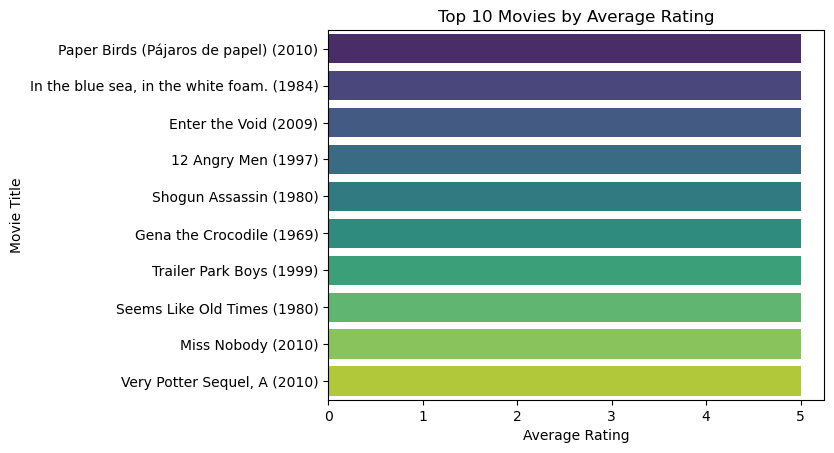

In [98]:
sns.barplot(x="rating", y="title", data=top_10_movies, palette="viridis")

plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.title("Top 10 Movies by Average Rating")

plt.show()

Top 10, I recognize 12 Angry men, Enter the Void, and Trailer park boys. Other than that, this top 10 list is rather irrelevant and not actually reflecting an accurate top 10 to my knowledge, aside from 12 Angry men.

Lets work on finding which genres get higher ratings.

merge average_ratings and movies and group by genre

plot results

In [115]:
genre_avg_ratings = pd.merge(movies, avg_ratings, on="movieId")

In [117]:
genre_avg_ratings = genre_avg_ratings.drop("Unnamed: 0", axis=1)

In [125]:
genre_avg_ratings["genres"] = genre_avg_ratings["genres"].str.split('|')

In [126]:
genre_avg_ratings = genre_avg_ratings.explode(column="genres")

The genres are now split into multiple rows.

In [128]:
genre_sum = genre_avg_ratings.groupby("genres").agg({"rating":"mean"}).reset_index()

In [129]:
genre_sum = genre_sum.sort_values(by="rating", ascending=False)

In [132]:
genre_sum = genre_sum[genre_sum["genres"] != '(no genres listed)']

Now to plot it.

/var/folders/_b/wwq21lgj60n56gm2gb2n93sw0000gn/T/ipykernel_45088/2552720159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="genres", y="rating", data=genre_sum, palette="viridis")


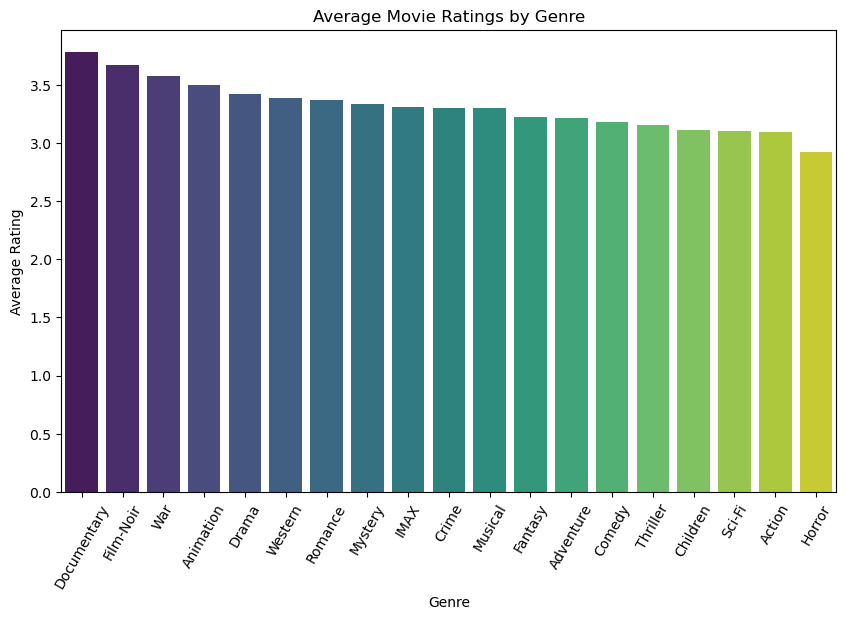

In [142]:
plt.figure(figsize=(10,6))
sns.barplot(x="genres", y="rating", data=genre_sum, palette="viridis")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Movie Ratings by Genre")
plt.xticks(rotation=60)
plt.show()